In [281]:
# import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [282]:
#Example
#Dataset
#https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv
df = pd.read_csv("https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv")
print(df.shape)
df

(13, 3)


,Temperature,Humidity,Fires
0,22.8,40,No
1,29.6,27,Yes
2,17.8,51,No
3,19.3,38,No
4,28.6,27,Yes
5,17.8,56,Yes
6,17.7,25,Yes
7,18.2,46,Yes
8,25.1,27,No
9,30.2,24,No


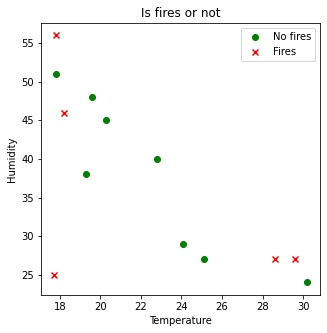

In [283]:
#plot results
GroupNo = df[df['Fires']=='No']
GroupYes = df[df['Fires']=='Yes']
plt.figure(figsize=(5,5))
plt.title("Is fires or not")
plt.scatter(GroupNo['Temperature'],GroupNo['Humidity'],color='green',marker = 'o',label='No fires')
plt.scatter(GroupYes['Temperature'],GroupYes['Humidity'],color='red',marker = 'x',label='Fires')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(loc='upper right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


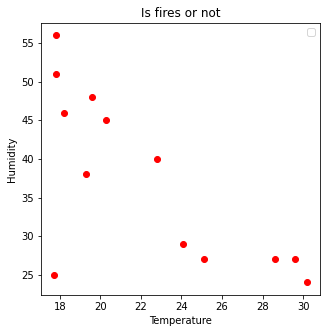

In [284]:
#plot results
GroupNo = df[df['Fires']=='No']
GroupYes = df[df['Fires']=='Yes']
plt.figure(figsize=(5,5))
plt.title("Is fires or not")
plt.scatter(GroupNo['Temperature'],GroupNo['Humidity'],color='red',marker = 'o')
plt.scatter(GroupYes['Temperature'],GroupYes['Humidity'],color='red',marker = 'o')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(loc='upper right')
plt.show()

In [285]:
#import machine learning library
from sklearn.cluster import KMeans

In [286]:
kmeans = KMeans(n_clusters=2, random_state=1,)

In [287]:
model = kmeans.fit(df[['Temperature','Humidity']])

C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [288]:
from sklearn import metrics
labels = model.labels_
print(labels.shape)
print(df['Fires'])
labels

(13,)
0      No
1     Yes
2      No
3      No
4     Yes
5     Yes
6     Yes
7     Yes
8      No
9      No
10     No
11     No
12     No
Name: Fires, dtype: object


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [289]:
metrics.silhouette_score(df[['Temperature','Humidity']], labels, metric='euclidean')

0.6448316893338306

In [290]:
#New data
new_temperature = 25.1 
new_humidity = 33

answer = model.predict([[new_temperature,new_humidity]])
print("The answer is",answer[0])

The answer is 1


C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [291]:
#Calcutate distance
def get_distance(X,Y,x_point,y_point):
  return np.sort(np.sqrt((X-x_point)**2 + (Y-y_point)**2))
distance = get_distance(df['Temperature'],df['Humidity'],new_temperature,new_humidity)
distance

array([ 4.12310563,  6.        ,  6.94622199,  7.36817481,  7.5       ,
        7.65767589, 10.34456379, 10.89770618, 12.92439554, 14.71767645,
       15.97654531, 19.42395428, 24.13068586])

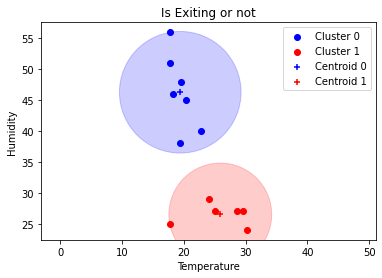

In [292]:
#Plot results
Cluster0 = df[model.labels_ == 0]
Cluster1 = df[model.labels_ == 1]
# print(Cluster0)
# print(Cluster1)
cx1 = model.cluster_centers_[0] # เรียกตัว centers
cx2 = model.cluster_centers_[1]

for i in range(1):
    distance1 = get_distance(Cluster0[str(Cluster0.columns[i])],Cluster0[str(Cluster0.columns[i+1])],cx1[i],cx1[i+1])
    distance2 = get_distance(Cluster1[str(Cluster1.columns[i])],Cluster1[str(Cluster1.columns[i+1])],cx2[i],cx2[i+1])

    radious1 = max(distance1)
    radious2 = max(distance2)

    plt.title("Is Exiting or not")
    plt.xlabel(str(Cluster0.columns[i]))
    plt.ylabel(str(Cluster0.columns[i+1]))
    plt.axis('equal')

    circle1 = plt.Circle((cx1[i],cx1[i+1]),radious1,alpha=0.2,color='b')
    plt.gcf().gca().add_artist(circle1)
    circle2 = plt.Circle((cx2[i],cx2[i+1]),radious2,alpha=0.2,color='r')
    plt.gcf().gca().add_artist(circle2)

    plt.scatter(Cluster0[str(Cluster0.columns[i])],Cluster0[str(Cluster0.columns[i+1])],c='b',label = 'Cluster 0')
    plt.scatter(Cluster1[str(Cluster1.columns[i])],Cluster1[str(Cluster1.columns[i+1])],c='r',label = 'Cluster 1')
    plt.scatter(cx1[i],cx1[i+1],c='b',marker='+',label='Centroid 0')
    plt.scatter(cx2[i],cx2[i+1],c='r',marker='+',label='Centroid 1')
    plt.legend()

In [293]:
Num_K = [i+2 for i in range(9)]
silhouette_coef = []

for k in Num_K:
  kmeans = KMeans(n_clusters=k, random_state=1,)
  model = kmeans.fit(df[['Temperature','Humidity']])
  labels = model.labels_
  silhouette_coef.append(metrics.silhouette_score(df[['Temperature','Humidity']], labels, metric='euclidean'))
silhouette_coef

C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:13

[0.6448316893338306,
 0.4720235020455968,
 0.4714652472357601,
 0.4637338439400513,
 0.4627505525569149,
 0.38833953783072483,
 0.30986731993924904,
 0.2813138918989939,
 0.20748088532957415]

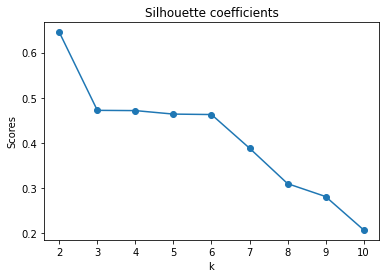

In [294]:
plt.scatter(Num_K,silhouette_coef)
plt.plot(Num_K,silhouette_coef)
plt.title('Silhouette coefficients')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()

In [295]:
Num_K = [i+1 for i in range(10)]
WCSS = []

for k in Num_K:
  kmeans = KMeans(n_clusters=k, random_state=1,)
  model = kmeans.fit(df[['Temperature','Humidity']])
  WCSS.append(model.inertia_)
WCSS

C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:13

[1775.0615384615385,
 374.4969047619047,
 217.52833333333334,
 135.185,
 70.60633333333332,
 37.385000000000005,
 24.884999999999998,
 16.759999999999998,
 9.953333333333337,
 5.705000000000004]

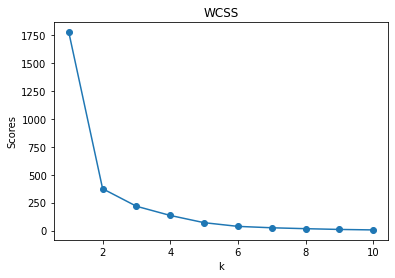

In [296]:
plt.scatter(Num_K,WCSS )
plt.plot(Num_K,WCSS )
plt.title('WCSS')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()